In [126]:
import datetime
from IPython.display import Image
import seaborn as sns
import re
import dateutil.parser
import pandas as pd
import random

# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


%matplotlib inline

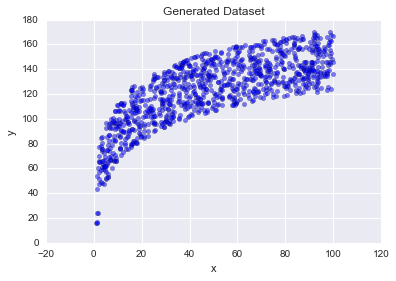

In [127]:

x = np.random.uniform(1, 100, 1000)
y = 7 + 25*np.log(x) + np.random.uniform(1, 50, 1000)
x = x.reshape(-1, 1); y = y.reshape(-1, 1)
plt.scatter(x,y,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.title('Generated Dataset');


In [128]:
dfx  = pd.DataFrame(x)
dfx.columns = ['x']
dfx['xsquare'] = dfx['x']**2
dfx

,x,xsquare
0,15.417192,237.689801
1,83.901839,7039.518572
2,13.785207,190.031926
3,10.077930,101.564681
4,72.025529,5187.676887
5,56.439865,3185.458356
6,35.772750,1279.689665
7,22.467258,504.777660
8,69.847367,4878.654726
9,80.303394,6448.635060


In [129]:
model5 = smf.OLS(y, dfx)
fit5 = model5.fit()
ypredict5 = fit5.predict(dfx)
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Thu, 27 Oct 2016   Prob (F-statistic):               0.00
Time:                        06:56:12   Log-Likelihood:                -4706.9
No. Observations:                1000   AIC:                             9418.
Df Residuals:                     998   BIC:                             9428.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              4.6284      0.058     79.692      0.000         4.514     4.742
xsquare       -0.0346      0.001    -45.964      0.000        -0.036    -0.033
==============================================================================
Omnibus:                       44.205   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.976
Skew:                           0.359   Prob(JB):                     4.19e-08
Kurtosis:                       2.452   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
dfx['logx'] = np.log(dfx['x'])
dfx2 = dfx[['logx','x']]
dfx2

,logx,x
0,2.735483,15.417192
1,4.429648,83.901839
2,2.623596,13.785207
3,2.310348,10.077930
4,4.277021,72.025529
5,4.033176,56.439865
6,3.577186,35.772750
7,3.112059,22.467258
8,4.246312,69.847367
9,4.385812,80.303394


In [131]:
model5 = smf.OLS(y, dfx2)
fit5 = model5.fit()
ypredict5 = fit5.predict(dfx2)
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.572e+04
Date:                Thu, 27 Oct 2016   Prob (F-statistic):               0.00
Time:                        06:56:12   Log-Likelihood:                -4110.8
No. Observations:                1000   AIC:                             8226.
Df Residuals:                     998   BIC:                             8235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logx          38.0080      0.395     96.174      0.000        37.233    38.784
x             -0.3108      0.026    -12.016      0.000        -0.362    -0.260
==============================================================================
Omnibus:                       67.422   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.827
Skew:                           0.114   Prob(JB):                     2.46e-06
Kurtosis:                       2.246   Cond. No.                         48.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

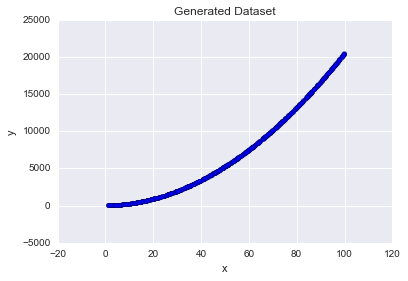

In [132]:
x2 = np.random.uniform(1, 100, 1000)
y2 = 7 + 5*x2 + 2*x2**2 + np.random.uniform(1, 10, 1000)
x2 = x2.reshape(-1, 1); y2 = y2.reshape(-1, 1)
plt.scatter(x2,y2,alpha=0.5)
plt.xlabel('x');   plt.ylabel('y')
plt.title('Generated Dataset');

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.25)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
mean_squared_error(y_train, y_train_pred)

2060748.0286633195

In [134]:
y_test_pred = lr.predict(X_test)
mean_squared_error(y_test, y_test_pred)

2229679.9202095056

In [135]:
train_error = []
test_error = []
R2 = []
lr = LinearRegression()

for i in range (0, 8):
    X = x**i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    lr.fit(X_train, y_train)
    ytrain_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, ytrain_pred))
    ytest_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, ytest_pred))
    R2.append(lr.score(X_test, y_test))

In [136]:
polynomial = list(range(0,8))

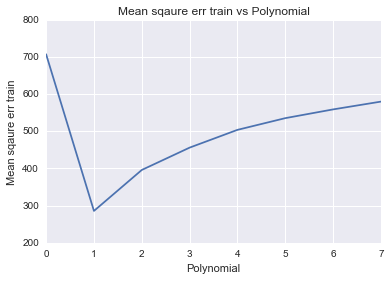

In [137]:
plt.plot(polynomial, train_error)
plt.xlabel('Polynomial')
plt.ylabel('Mean sqaure err train')
plt.title('Mean sqaure err train vs Polynomial');

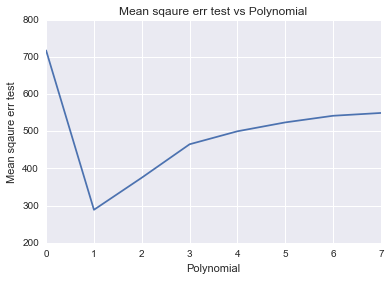

In [138]:
plt.plot(polynomial, test_error)
plt.xlabel('Polynomial')
plt.ylabel('Mean sqaure err test')
plt.title('Mean sqaure err test vs Polynomial');

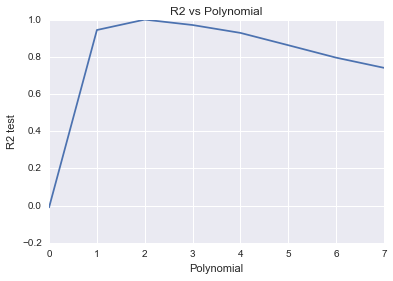

In [139]:
plt.plot(polynomial, r2)
plt.xlabel('Polynomial')
plt.ylabel('R2 test')
plt.title('R2 vs Polynomial');

In [156]:
train_error = []
test_error = []
X = np.square(x)
m = list(range(5, 755, 5))
for number in m:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    X_train = X_train[:number,:]
    y_train = y_train[:number]
    lr.fit(X_train, y_train)
    ytrain_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, ytrain_pred))
    ytest_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, ytest_pred))

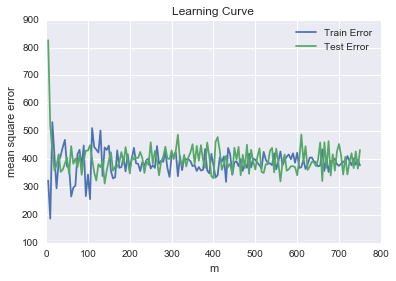

In [157]:
plt.plot(m, train_error)
plt.plot(m, test_error)
plt.legend(['Train Error', 'Test Error'])
plt.xlabel('m')
plt.ylabel('mean square error')
plt.title('Learning Curve');